In [9]:
import pandas as pd

# Cargar los resultados desde un archivo de texto
df = pd.read_csv('periodicidades.txt', sep='\s+', header=None, names=['periodicidad'])

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())

   periodicidad
0      0.057099
1      0.057793
2      0.055170
3      0.053657
4      0.033395


Media de periodicidades: 99.08 minutos
Mediana de periodicidades: 76.25 minutos
Desviación estándar: 521.91 minutos
Periodicidad mínima: 2.24 minutos
Periodicidad máxima: 11668.28 minutos


/tmp/ipykernel_18699/1100674466.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


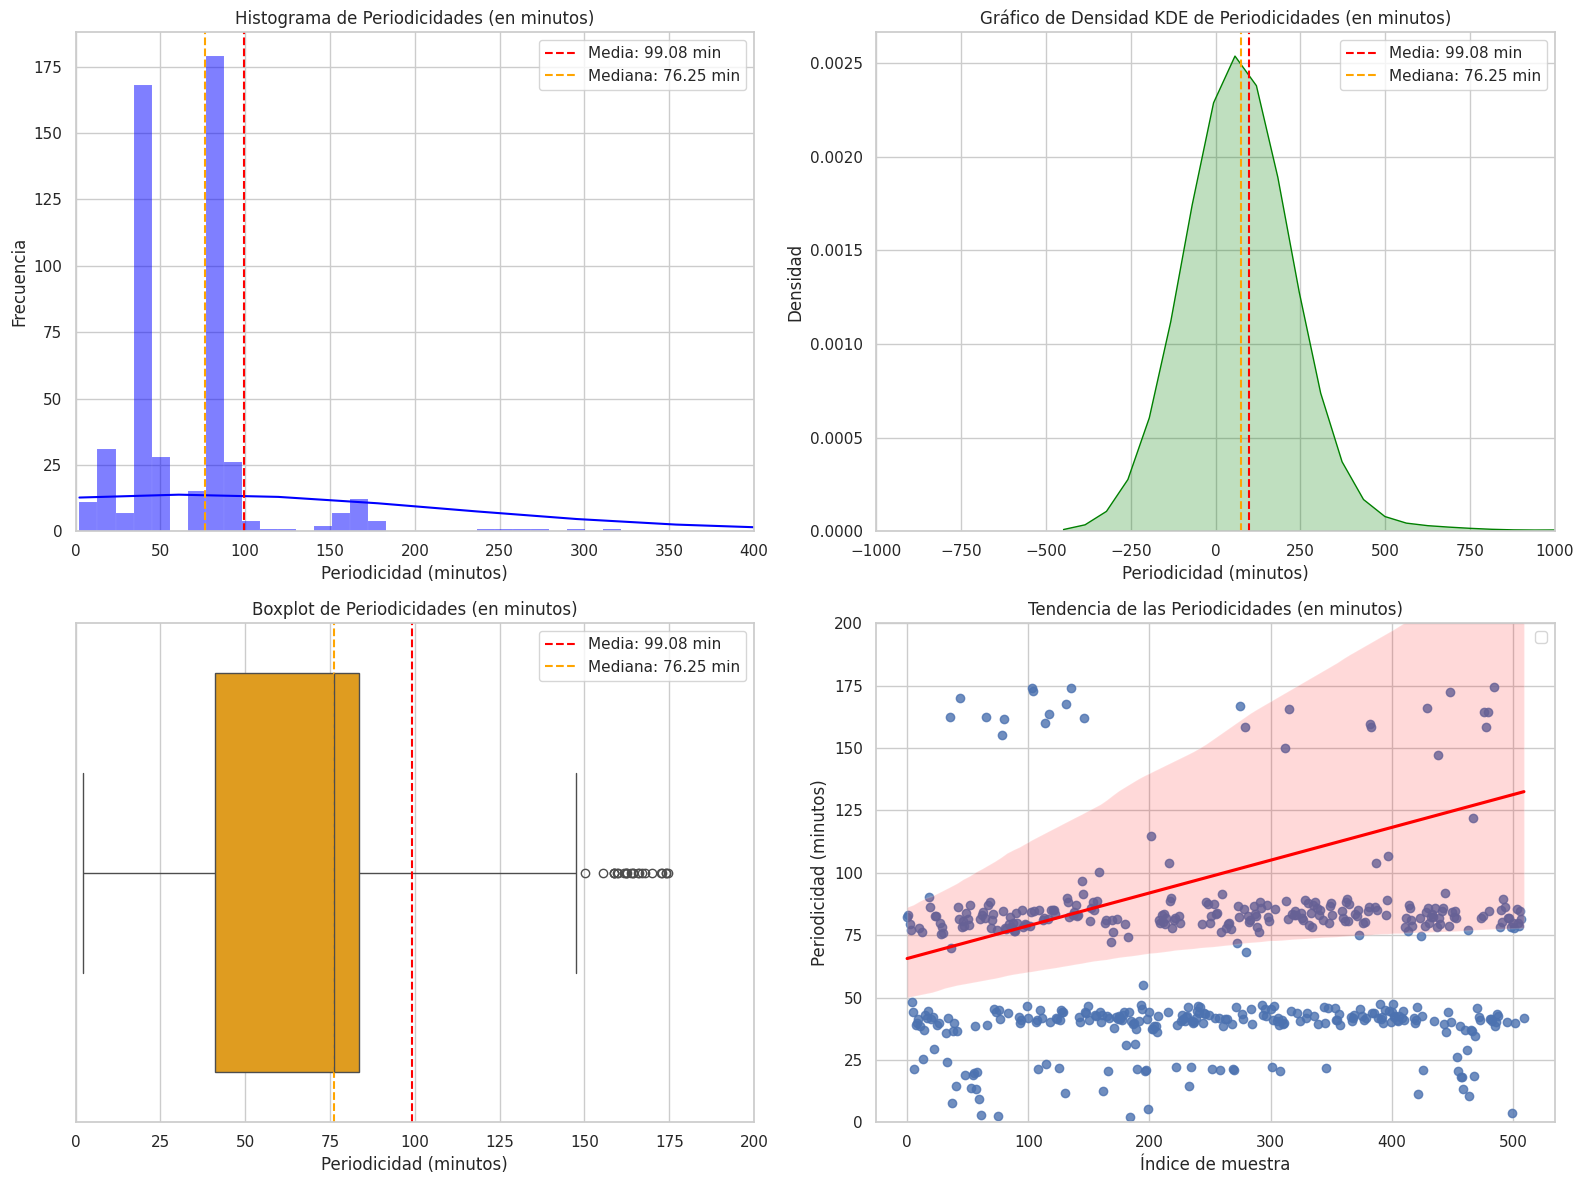

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Leer los datos del archivo periodicidades.txt
file_path = 'periodicidades.txt'  # Cambia esto por la ruta correcta de tu archivo
periods_days = pd.read_csv(file_path, header=None, names=['period_days'])

# Paso 2: Convertir las periodicidades de días a minutos
periods_minutes = periods_days['period_days'] * 24 * 60  # 1 día = 1440 minutos
periods_days['period_minutes'] = periods_minutes

# Paso 3: Cálculo de estadísticas básicas
mean_minutes = periods_minutes.mean()
median_minutes = periods_minutes.median()
std_minutes = periods_minutes.std()
min_minutes = periods_minutes.min()
max_minutes = periods_minutes.max()

print(f"Media de periodicidades: {mean_minutes:.2f} minutos")
print(f"Mediana de periodicidades: {median_minutes:.2f} minutos")
print(f"Desviación estándar: {std_minutes:.2f} minutos")
print(f"Periodicidad mínima: {min_minutes:.2f} minutos")
print(f"Periodicidad máxima: {max_minutes:.2f} minutos")

# Paso 4: Generación de gráficos

# Crear una figura con varios subplots
plt.figure(figsize=(16, 12))

# Gráfico 1: Histograma
plt.subplot(2, 2, 1)
sns.histplot(periods_minutes, bins='auto', kde=True, color='blue')
plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
plt.title('Histograma de Periodicidades (en minutos)')
plt.xlabel('Periodicidad (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 400)  # Limitar el eje x
plt.legend()

# Gráfico 2: KDE (Kernel Density Estimate)
plt.subplot(2, 2, 2)
sns.kdeplot(periods_minutes, fill=True, color='green')
plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
plt.title('Gráfico de Densidad KDE de Periodicidades (en minutos)')
plt.xlabel('Periodicidad (minutos)')
plt.ylabel('Densidad')
plt.xlim(-1000, 1000)  # Limitar el eje x
plt.legend()

# Gráfico 3: Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=periods_minutes, color='orange')
plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
plt.title('Boxplot de Periodicidades (en minutos)')
plt.xlabel('Periodicidad (minutos)')
plt.xlim(0, 200)  # Limitar el eje x
plt.legend()

# Gráfico 4: Gráfico de dispersión (scatter plot) con tendencia
plt.subplot(2, 2, 4)
sns.regplot(x=np.arange(len(periods_minutes)), y=periods_minutes, scatter=True, line_kws={"color": "red"})
plt.title('Tendencia de las Periodicidades (en minutos)')
plt.xlabel('Índice de muestra')
plt.ylabel('Periodicidad (minutos)')
plt.ylim(0, 200)  # Limitar el eje y a 200 minutos
plt.legend()

# Ajustar los gráficos
plt.tight_layout()
plt.show()